In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fake_df = pd.read_csv('Kaggle/Fake.csv')

real_df = pd.read_csv('Kaggle/True.csv')

fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
#Creating a Target column to label which news text is real or fake

real = [1 for x in range(len(real_df))]
fake = [0 for x in range(len(fake_df))]

real_df['Target'] = real

fake_df['Target'] = fake

In [5]:
real_df.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
fake_df.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
#Combining both data frames

news_df = pd.concat([real_df,fake_df], axis=0)

In [9]:
news_df

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


<AxesSubplot:xlabel='Target', ylabel='count'>

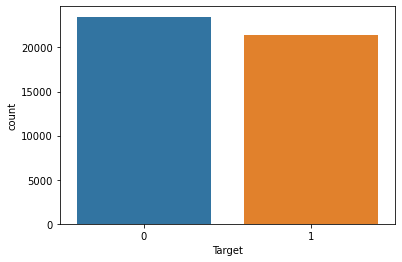

In [10]:
#Looking at a count to see if the data is unbalanced

sns.countplot(data=news_df, x='Target')

#Data is pretty well balanced

In [11]:
#No missing data in the dataframe

news_df.isnull().sum()

title      0
text       0
subject    0
date       0
Target     0
dtype: int64

In [12]:
#Classification of New Articles via Title

X = news_df['title']

y = news_df['Target']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

t_vector = TfidfVectorizer(stop_words = 'english')

In [21]:
t_vector.fit(X_train)

TfidfVectorizer(stop_words='english')

In [22]:
tv_train_results = t_vector.transform(X_train)

tv_test_results = t_vector.transform(X_test)

In [23]:
#Creating Machine Learning Models

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [24]:
nb = MultinomialNB()
nb.fit(tv_train_results,y_train)

MultinomialNB()

In [25]:
bnb = BernoulliNB()
bnb.fit(tv_train_results, y_train)

BernoulliNB()

In [26]:
log_model = LogisticRegression( max_iter=1000)
log_model.fit(tv_train_results, y_train)

LogisticRegression(max_iter=1000)

In [27]:
rbf_svc = SVC()
rbf_svc.fit(tv_train_results,y_train)

SVC()

In [28]:
linear_svc = LinearSVC()
linear_svc.fit(tv_train_results, y_train)

LinearSVC()

In [29]:
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score

In [34]:
#Creating an easy / automatic function that will allow you to generate an easy reading report

def report(model):
    pred = model.predict(tv_test_results)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model, tv_test_results, y_test)
    

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6978
           1       0.95      0.91      0.93      6492

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



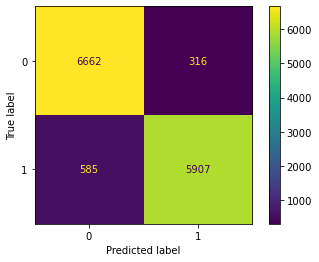

In [35]:
report(nb)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6978
           1       0.94      0.94      0.94      6492

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



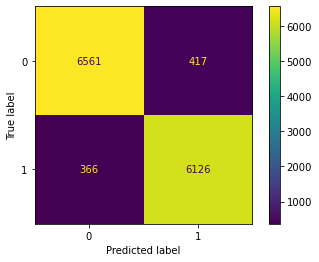

In [36]:
report(bnb)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6978
           1       0.95      0.96      0.95      6492

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



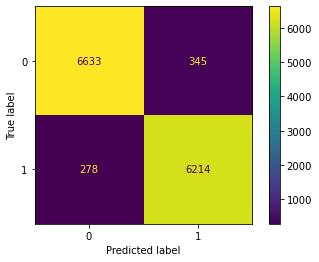

In [37]:
report(rbf_svc)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6978
           1       0.95      0.95      0.95      6492

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



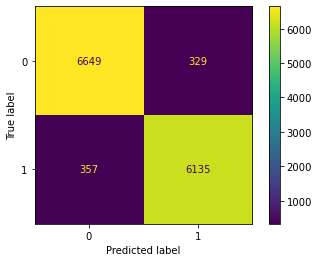

In [38]:
report(linear_svc)